In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
df = pd.read_csv('results.csv')
df

,database,dataset,scale,variant,errors,time
0,neo4j,recommendations,1.0,full,none,1825
1,neo4j,recommendations,1.0,full,none,1327
2,neo4j,recommendations,1.0,full,none,1274
3,neo4j,recommendations,1.0,boolean,none,1713
4,neo4j,recommendations,1.0,boolean,none,1515
...,...,...,...,...,...,...
73,tigergraph,snb,1.0,full,none,1037
74,tigergraph,snb,1.0,full,none,1009
75,tigergraph,snb,1.0,boolean,none,1009
76,tigergraph,snb,1.0,boolean,none,1026


In [25]:
full_vs_boolean = df[(df.database == "neo4j") & (df.scale == 0.1) & (df.errors == "none")]
full = full_vs_boolean[full_vs_boolean.variant == "full"].time
boolean = full_vs_boolean[full_vs_boolean.variant == "boolean"].time

t_stat, p_value = stats.ttest_ind(full, boolean)
print(f"p={p_value}, T={t_stat}")

p=6.194487656700258e-06, T=31.318427085384315


In [34]:
compare_error_rates = df[(df.database == "neo4j") & (df.scale == 0.1) & (df.variant == "boolean")]
none = compare_error_rates[compare_error_rates.errors == "none"].time
single = compare_error_rates[compare_error_rates.errors == "single"].time
half = compare_error_rates[compare_error_rates.errors == "half"].time

t_stat, p_value = stats.ttest_ind(none, single)
print(f"none vs single: p={p_value:.5f}, T={t_stat:.5f}")

t_stat, p_value = stats.ttest_ind(single, half)
print(f"single vs half: p={p_value:.5f}, T={t_stat:.5f}")

t_stat, p_value = stats.ttest_ind(none, half)
print(f"none vs half:   p={p_value:.5f}, T={t_stat:.5f}")

none vs single: p=0.27207, T=1.27270
single vs half: p=0.02018, T=3.73659
none vs half:   p=0.00375, T=6.05840


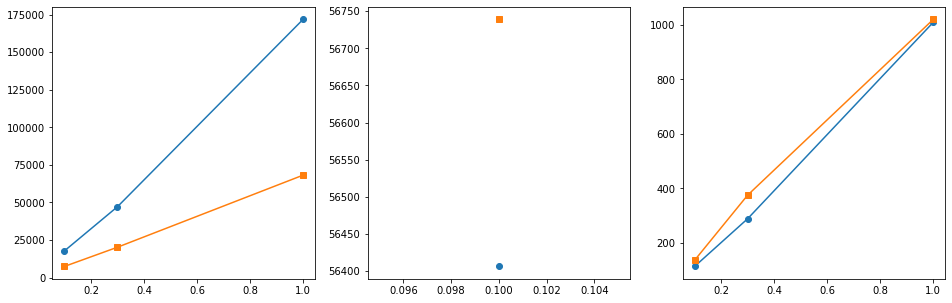

In [94]:
def compare_scales_per_db(ax, db):
    compare_scales = df[
        (df.database == db) & (df.dataset == "snb") & (df.errors == "none")
    ]
    full = compare_scales[compare_scales.variant == "full"].groupby('scale').mean()
    boolean = compare_scales[compare_scales.variant == "boolean"].groupby('scale').mean()
    ax.plot(full, "o-")
    ax.plot(boolean, "s-")

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
compare_scales_per_db(axs[0], "neo4j")
compare_scales_per_db(axs[1], "janusgraph")
compare_scales_per_db(axs[2], "tigergraph")
plt.show()